In [122]:
#pip install psycopg2 #Instalando la libreria para la conexion a Postgres

import psycopg2

# Connect to an existing database
conn = psycopg2.connect('host=localhost dbname=db_tutorial_bloodstream user=postgres password=admin')

# Open a cursor to perform database operations
cur = conn.cursor()

# Query the database and obtain data as Python objects
#cur.execute('SELECT id, uuid, "Name", "Subtitle", "Icon_Url", "Description", "Developer", "Age_Rating", "Size", "Original_Release_Date", "Current_Version_Release_Date", "createdAt", "updatedAt"  FROM games LIMIT 10;')

#Print result
#for id, uuid, Name, Subtitle, Icon_Url, Description, Developer, Age_Rating, Size, Original_Release_Date, Current_Version_Release_Date, createdAt, updatedAt in cur.fetchall() :
#    print(id, uuid, Name, Subtitle, Icon_Url, Description, Developer, Age_Rating, Size, Original_Release_Date, Current_Version_Release_Date, createdAt, updatedAt)
cur.execute('SELECT * FROM games limit 10;')

#for row in cur.fetchall():
#    print(row)

import pandas as pd
# Usa read_sql_query de pandas para extraer el resultado
# de la consulta a un DataFrame
df = pd.read_sql_query("SELECT * from games", conn)

df_grupo_edades = pd.read_sql_query('select "Age_Rating", count(*) as Total from games group by "Age_Rating"', conn)
# Verifica que el resultado de la consulta SQL está
# almacenado en el DataFrame
print(df_grupo_edades)

# Make the changes to the database persistent
conn.commit()

# Close communication with the database
cur.close()
conn.close()

  Age_Rating  total
0         9+   2447
1        17+    654
2        12+   2017
3         4+  11624


In [152]:
edades = df_grupo_edades.iloc[:,0]


In [153]:
cantidad = df_grupo_edades.iloc[:,1]

In [158]:
edades

0     9+
1    17+
2    12+
3     4+
Name: Age_Rating, dtype: object

In [157]:
cantidad

0     2447
1      654
2     2017
3    11624
Name: total, dtype: int64

In [159]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

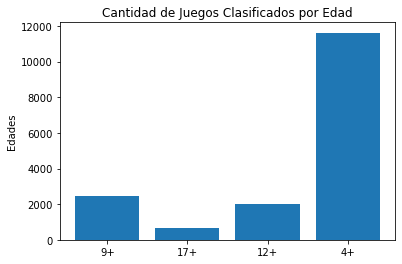

In [162]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Edades')
#Colocamos una etiqueta en el eje X
ax.set_title('Cantidad de Juegos Clasificados por Edad')
#Creamos la grafica de barras utilizando 'edades' como eje X y 'cantidad' como eje y.
plt.bar(edades, cantidad)
plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()